### Before starting the project , i want really thank `EPSILON` for their efforts 
I started my journey with them about a 9 month ago , i was very intesrested with my new journy as a step by step data scienest , I started my round with **ENG/Ahmed Noaman** and **ENG/Ayed Ali** but unfortunately I experienced some health conditions leading me to do two surgeries and making a freeze for the diploma , after I got well and come back from the freeze i met agreat instructor **ENG/Salah Tarek** who i want to realy thank him for his effort and of course **ENG/Mohab Allam** , today el hamdullah i am with good health condithions , i have graduated from my college with excellent degree , witnissing the end of the journey with epsilon but it is not an end it is just a start with another journey with them , Now i am doing an end to end data science project :) 

## LifeCycle of our project 
- Unterstanding the Problem Statemet
- Data Colleection
- Data Cleaning Phase
- Explotary Data Analysis (EDA)
- Feature Engineering
- EDA & Data Visualization
- data Preprocessing (DPP)
- Feature Selection
- Pick and Tune an Algorithm
- Validate and Evaluate
- Best Model Selection
- Project Deployment

### Problem statement
- In this dataset we will predict the price of any property in egypt using regression models , we have a good dataset , our dataset has 27361 values(records) and 12 columns(features). We will prepare our data and use machine learning models to achieve our goal.


### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mohammedaltet/egypt-houses-price/data
- The data set consists of 12 column (our main features).

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Egypt_Houses_Price.csv', sep = ',')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


**Insights**
- from the info we can see that we have problem with data type and we need to work on it
- we have some Null to deal whith

## Data Cleaning Phase

**Dealing With Null And Duplicated Rows**

In [4]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [5]:
for x in df.columns :
    print(f"{x} has {df[x].unique()}")
    print("*"*20)

Type has ['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Unknown' 'Chalet'
 'Standalone Villa' 'Twin house' 'Town House' 'Stand Alone Villa'
 'Twin House']
********************
Price has ['4000000' '2250000' '1900000' ... '6276000' '11950000' '12284000']
********************
Bedrooms has ['3.0' '2.0' '4.0' '5.0' '1.0' 'Unknown' '7.0' '6.0' '10+' '3' '2' '5' '4'
 '1' '6' '7' nan '8' '10' '9' '9.0' '8.0' '10.0']
********************
Bathrooms has ['3.0' '2.0' '5.0' '1.0' '4.0' 'Unknown' '7.0' '10+' '3' '2' '1' '4' '6'
 '5' '7' nan '8' '6.0' '10.0' '9' '10' '8.0' '9.0']
********************
Area has ['400.0' '160.0' '165.0' ... '933.0' '631.0' '762.0']
********************
Furnished has ['No' 'Unknown' 'Yes']
********************
Level has ['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']
********************
Compound has ['Unknown' 'Eastown' 'Beit Al Watan' 'Jayd' 'Zayed 2000' '90 Avenue'
 'Armonia' 'Palm Hills New Cairo' 'La Mirada' 'Maadi V' 'One Kattameya'
 'G

we have many unkowns

In [6]:
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)
#changing Unkhown data to NAN 

In [7]:
df.isnull().sum()

Type                0
Price              39
Bedrooms          239
Bathrooms         207
Area              507
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

So we can drop null values as it is not too much

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

1550

In [10]:
df.drop_duplicates(inplace=True)

### Data Preprocessing (DPP)

### Fixing the Dtype for the columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25143 non-null  object
 1   Price           25143 non-null  object
 2   Bedrooms        25143 non-null  object
 3   Bathrooms       25143 non-null  object
 4   Area            25143 non-null  object
 5   Furnished       25143 non-null  object
 6   Level           25143 non-null  object
 7   Compound        25143 non-null  object
 8   Payment_Option  25143 non-null  object
 9   Delivery_Date   25143 non-null  object
 10  Delivery_Term   25143 non-null  object
 11  City            25143 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [12]:
for x in df.columns :
    print(f"{x} has {df[x].unique()}")
    print("*"*20)

Type has ['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']
********************
Price has ['4000000' '2250000' '1900000' ... '6276000' '11950000' '12284000']
********************
Bedrooms has ['3.0' '2.0' '4.0' '5.0' '1.0' '7.0' '6.0' '10+' '3' '2' '5' '4' '1' '6'
 '7' '8' '10' '9' '9.0' '8.0' '10.0']
********************
Bathrooms has ['3.0' '2.0' '5.0' '1.0' '4.0' '7.0' '10+' '3' '2' '1' '4' '6' '5' '7'
 '6.0' '10' '8' '9' '8.0' '10.0' '9.0']
********************
Area has ['400.0' '160.0' '165.0' ... '933.0' '631.0' '762.0']
********************
Furnished has ['No' 'Unknown' 'Yes']
********************
Level has ['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']
********************
Compound has ['Unknown' 'Eastown' 'Beit Al Watan' 'Jayd' 'Zayed 2000' '90 Avenue'
 'Armonia' 'Palm Hills New Cairo' 'La Mirada' 'Maadi V' 'One Kattameya'
 'Gardenia' 'The Pearl' 'Village West' 'Pa

In [13]:
df['Bedrooms'] = df['Bedrooms'].replace('10+',11)
df['Bathrooms'] = df['Bathrooms'].replace('10+',11)

In [14]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(int)

In [15]:
print(df['Type'].unique())
print(df['Level'].unique())

['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']
['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']


### From searching info we got that :
- ( Duplex , Apartment , Studio ) type can be in different level 
- ( Twin house , Town House , Stand Alone Villa ,Chalet ) type only on Ground level
- ( Penthouse ) type is on Highest only

### From type of property , we will change the level from int to str 
- Ground = 0
- 10+ = 11
- Highest = 12

In [16]:
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Duplex')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Apartment')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Studio')].index)

In [17]:
df.loc[(df['Level']=='10+'),'Level'] = 11
df.loc[(df['Level']=='Highest'),'Level'] = 12
df.loc[(df['Level']=='Ground'),'Level'] = 0

In [18]:
df.loc[(df['Type']=='Penthouse')|
       (df['Type']=='Standalone Villa')|
       (df['Type']=='Town House')|
       (df['Type']=='Twin house')|(df['Type']=='Stand Alone Villa')|
       (df['Type']=='Chalet')|
       (df['Type']=='Twin House'),'Level'] = 0
df.loc[(df['Type']=='Penthouse'),'Level'] = 12

In [19]:
df['Level'] = df['Level'].astype(float).astype(int)

### Furnished Column

In [20]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [21]:
df[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown')]
#we can replace the Furnished data here naturally with NO

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
9,Apartment,992800,3,2,146,Unknown,3,Unknown,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
64,Apartment,1396000,3,3,179,Unknown,0,Unknown,Cash or Installment,2024,Semi Finished,6th of October
67,Apartment,1805000,2,2,105,Unknown,0,Kayan,Installment,2024,Semi Finished,Sheikh Zayed
76,Apartment,1526400,3,2,212,Unknown,2,Beit Al Watan,Installment,2023,Semi Finished,New Damietta
83,Apartment,1648000,3,3,160,Unknown,3,Midtown Condo,Cash or Installment,2023,Core & Shell,New Capital City
...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Town House,7100000,5,4,285,Unknown,0,Lake West,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27247,Town House,300000,4,4,220,Unknown,0,Mountain View 2,Cash or Installment,2025,Not Finished,New Cairo - El Tagamoa
27275,Twin House,4500000,3,2,200,Unknown,0,The Crown,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27276,Twin House,4900000,4,3,317,Unknown,0,The Crown,Cash or Installment,soon,Unknown,Sheikh Zayed


In [22]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown'),'Furnished'] = 'No'

In [23]:
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
       'Not Finished'], dtype=object)

In [24]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown ')]
# We can replace the Furnished data here naturally with NO bec the Delicery Term is not finished yet

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
8,Apartment,1560000,3,3,200,Unknown,0,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
19,Duplex,1100000,3,2,165,Unknown,0,Unknown,Installment,Unknown,Semi Finished,New Damietta
86,Apartment,1613800,3,3,182,Unknown,1,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
95,Apartment,2520000,3,2,145,Unknown,1,The Address East,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
102,Apartment,370000,3,2,130,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam
...,...,...,...,...,...,...,...,...,...,...,...,...
27300,Twin House,1268000,7,7,298,Unknown,0,Palm Hills New Cairo,Unknown Payment,Ready to move,Not Finished,New Cairo - El Tagamoa
27320,Stand Alone Villa,13500000,5,5,530,Unknown,0,Villette,Cash,Ready to move,Core & Shell,New Cairo - El Tagamoa
27327,Stand Alone Villa,3750000,3,2,400,Unknown,0,Unknown,Cash,Unknown,Core & Shell,Hurghada
27341,Town House,4000000,4,4,350,Unknown,0,Unknown,Cash or Installment,Unknown,Semi Finished,New Capital City


In [25]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown '),'Furnished'] = 'No'

### Drop columns that have more than 30% of NANs

In [26]:
furnished = len(df[df['Furnished'] == 'Unknown']) / len(df)
level = len(df[df['Level'] == 'Unknown']) / len(df)
compound = len(df[df['Compound'] == 'Unknown']) / len(df)
Payment_Option = len(df[df['Payment_Option'] == 'Unknown']) / len(df)
Delivery_Date = len(df[df['Delivery_Date'] == 'Unknown']) / len(df)
Delivery_Term = len(df[df['Delivery_Term'] == 'Unknown ']) / len(df)
City = len(df[df['City'] == 'Unknown']) / len(df)

In [27]:
print('Furnished: ', furnished)
print('Level: ',level)
print('Compound: ',compound)
print('Payment_Option: ',Payment_Option)
print('Delivery_Date: ',Delivery_Date)
print('Delivery_Term: ',Delivery_Term)
print('City: ',City)

Furnished:  0.21194743130227
Level:  0.0
Compound:  0.4048984468339307
Payment_Option:  0.0
Delivery_Date:  0.3637594583831143
Delivery_Term:  0.17459179609717243
City:  0.0


In [28]:
df = df.drop('Compound',1)
df = df.drop('Delivery_Date',1)

In [29]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [30]:
df['Furnished'] = df['Furnished'].replace('Unknown', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', np.nan)
df.dropna(inplace=True)

In [31]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17624 entries, 0 to 17623
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            17624 non-null  object
 1   Price           17624 non-null  int32 
 2   Bedrooms        17624 non-null  int32 
 3   Bathrooms       17624 non-null  int32 
 4   Area            17624 non-null  int32 
 5   Furnished       17624 non-null  object
 6   Level           17624 non-null  int32 
 7   Payment_Option  17624 non-null  object
 8   Delivery_Term   17624 non-null  object
 9   City            17624 non-null  object
dtypes: int32(5), object(5)
memory usage: 1.0+ MB


In [33]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
City              0
dtype: int64

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,17624.0,4.737109e+06,5.755835e+06,30000.0,1399000.0,3000000.0,6063862.25,205000000.0
Bedrooms,17624.0,3.249376e+00,1.160085e+00,1.0,3.0,3.0,4.00,11.0
Bathrooms,17624.0,2.835111e+00,1.319538e+00,1.0,2.0,3.0,4.00,11.0
Area,17624.0,2.345296e+02,1.626049e+02,10.0,125.0,180.0,280.00,995.0
Level,17624.0,1.274455e+00,2.574008e+00,0.0,0.0,0.0,2.00,12.0


In [35]:
df.describe(include=['O']).T

,count,unique,top,freq
Type,17624,10,Apartment,5941
Furnished,17624,2,No,15756
Payment_Option,17624,4,Cash,7011
Delivery_Term,17624,4,Finished,10049
City,17624,171,New Cairo - El Tagamoa,4265


### Type Column

In [36]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [37]:
df['Type'].value_counts()

Apartment            5941
Chalet               3837
Stand Alone Villa    2781
Town House           1990
Twin House           1265
Duplex                603
Penthouse             376
Standalone Villa      362
Twin house            323
Studio                146
Name: Type, dtype: int64

In [38]:
df.loc[(df['Type']=='Standalone Villa'),'Type'] = 'Stand Alone Villa'
df.loc[(df['Type']=='Twin house'),'Type'] = 'Twin House'

In [39]:
df['Type'].value_counts()

Apartment            5941
Chalet               3837
Stand Alone Villa    3143
Town House           1990
Twin House           1588
Duplex                603
Penthouse             376
Studio                146
Name: Type, dtype: int64

### City Column

#### Deleting Location/City that have less than 5 rows
- city with low data don't give enough help to the model it's better to drop it

In [40]:
pd.set_option('display.max_rows', 500)
df['City'].value_counts(ascending=True)

Abu Rawash                      1
Zawya al-Hamra                  1
El Max                          1
Saft El Laban                   1
Attarin                         1
Khanka                          1
Zohour District                 1
Hadayek Helwan                  1
Ard El Lewa                     1
Quesna                          1
Banha                           1
New Beni Suef                   1
Darb al-Ahmar                   1
Qasr al-Nil                     1
Tura                            1
Shatby                          1
Ramses + Ramses Extension       1
Attaka                          1
El Fostat                       1
Minya City                      1
Kafr Shukr                      1
Bella                           1
Safaga                          1
Gomrok                          1
Ataba                           1
Aga                             1
Schutz                          1
Dhahria                         1
Sadat                           1
Talkha        

In [41]:
ind = df['City'].value_counts(dropna=False).keys().tolist()
val = df['City'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [42]:
value_dict

[('New Cairo - El Tagamoa', 4265),
 ('North Coast', 3679),
 ('Sheikh Zayed', 1609),
 ('6th of October', 1260),
 ('Madinaty', 1132),
 ('Ain Sukhna', 1023),
 ('Rehab City', 527),
 ('New Capital City', 514),
 ('Shorouk City', 506),
 ('Nasr City', 259),
 ('Mokattam', 157),
 ('Alamein', 154),
 ('Ras Sedr', 145),
 ('Obour City', 132),
 ('Mostakbal City', 126),
 ('Hadayek 6th of October', 124),
 ('Borg al-Arab', 98),
 ('Nakheel', 96),
 ('Smoha', 92),
 ('Hurghada', 87),
 ('Maadi', 86),
 ('Zahraa Al Maadi', 84),
 ('Hadayek al-Ahram', 76),
 ('Heliopolis', 74),
 ('Badr City', 71),
 ('Agami', 59),
 ('New Heliopolis', 54),
 ('Haram', 48),
 ('Mansura', 47),
 ('Katameya', 37),
 ('Faisal', 34),
 ('Sidi Beshr', 34),
 ('Marsa Matrouh', 34),
 ('Mohandessin', 29),
 ('(View phone number)', 28),
 ('Miami', 27),
 ('Sheraton', 27),
 ('Laurent', 22),
 ('Moharam Bik', 22),
 ('New Nozha', 21),
 ('New Mansoura', 21),
 ('Sharm al-Sheikh', 21),
 ('Gouna', 20),
 ('10th of Ramadan', 19),
 ('Dokki', 19),
 ('Seyouf', 1

In [43]:
lc_sm = []
y = 'Less'
for val,ind in value_dict:
    if ind <= 5:
        lc_sm.append(val)
    else :
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [44]:
df['City'] = df['City'].apply(lcdlt)

In [45]:
df=df.drop(df[(df['City']=='Less')].index)

### price depends highly with the location so we will deduct outlines for every city manualy

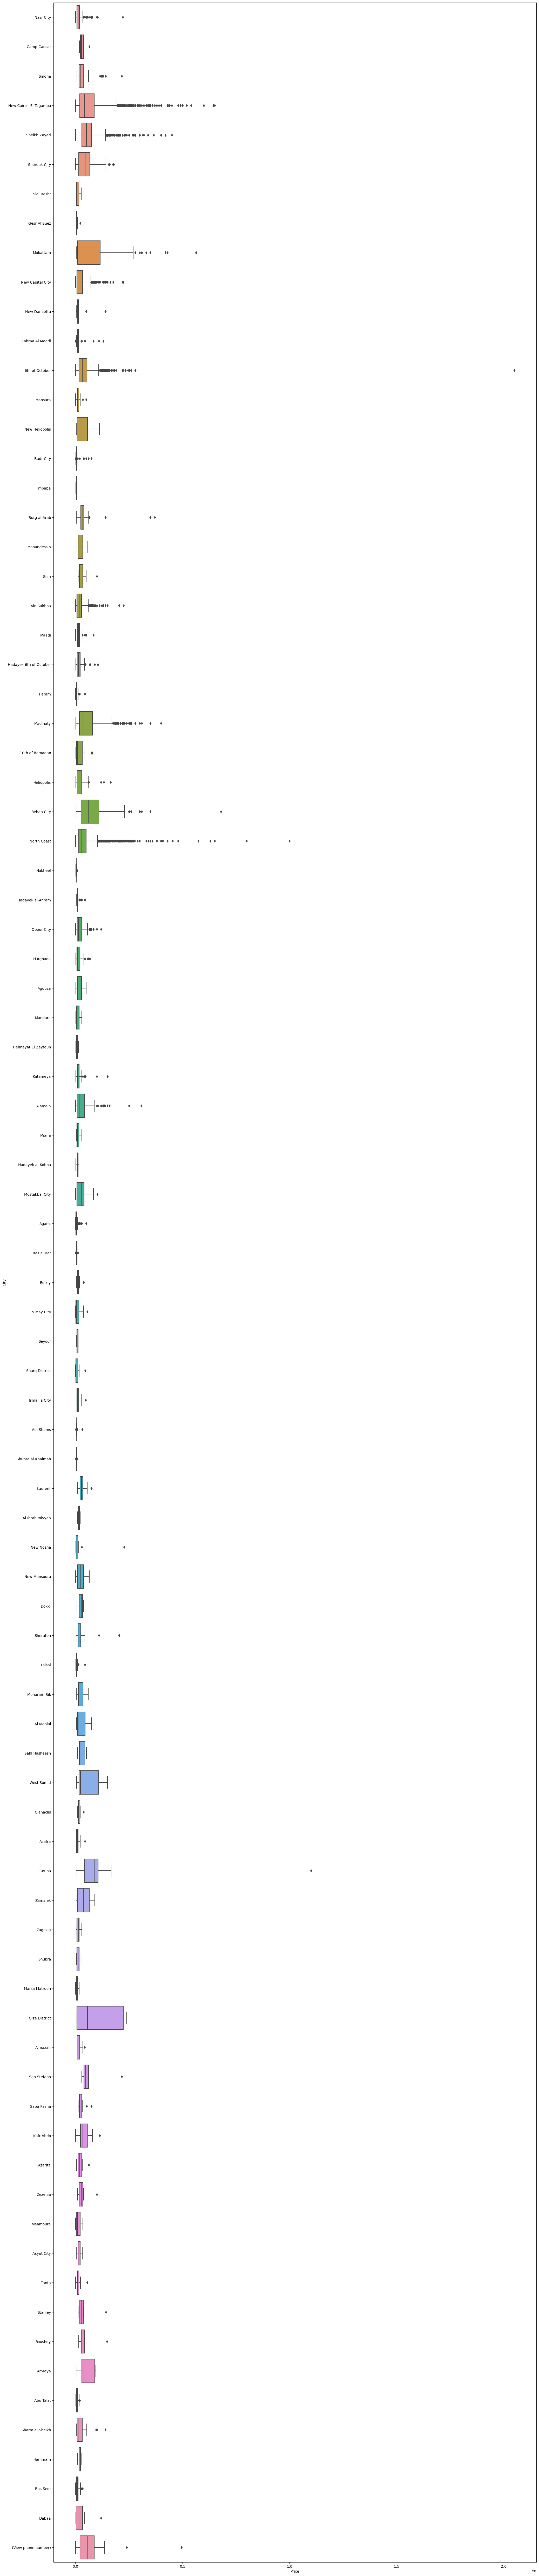

In [46]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df);

In [47]:
lcc = df['City'].value_counts().keys().tolist()

In [48]:
for x in lcc:
    Q1= df[(df['City']==x)]['Price'].quantile(0.25)
    Q3= df[(df['City']==x)]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.2 * IQR
    lower_bound = Q1 - 1.2 * IQR
    df=df.drop(df[(df['City']==x)&(df['Price']>=upper_bound)].index)
    df=df.drop(df[(df['City']==x)&(df['Price']<=lower_bound)].index)

In [49]:
df['City'].unique()

array(['Camp Caesar', 'Smoha', 'Nasr City', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis', 'Badr City',
       'Imbaba', 'Mohandessin', 'Glim', 'Ain Sukhna', 'Maadi',
       'Hadayek 6th of October', 'Haram', 'Madinaty', '10th of Ramadan',
       'Heliopolis', 'Rehab City', 'North Coast', 'Nakheel',
       'Hadayek al-Ahram', 'Obour City', 'Hurghada', 'Agouza', 'Mandara',
       'Helmeyat El Zaytoun', 'Katameya', 'Alamein', 'Miami',
       'Hadayek al-Kobba', 'Mostakbal City', 'Agami', 'Ras al-Bar',
       'Bolkly', '15 May City', 'Seyouf', 'Sharq District',
       'Ismailia City', 'Ain Shams', 'Shubra al-Khaimah',
       'Al Ibrahimiyyah', 'New Nozha', 'Laurent', 'New Mansoura', 'Dokki',
       'Sheraton', 'Faisal', 'Moharam Bik', 'Al Manial', 'Sahl Hasheesh',
       'West Somid', 'Asafra', 'Gouna', 'Zamalek', '

In [50]:
df=df.drop(df[df['City']=='(View phone number)'].index)

In [51]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

### Area Column

In [52]:
df['Area'].describe()

count    16095.000000
mean       216.157999
std        140.672771
min         10.000000
25%        125.000000
50%        175.000000
75%        260.000000
max        990.000000
Name: Area, dtype: float64

In [53]:
#deleting some raws that doesn't make sense like 4 rooms in 100 meters
df=df.drop(df[(df['Area']<=100)&(df['Bedrooms']>=4)].index)
df=df.drop(df[(df['Area']<=30)&(df['Type']!='Studio')].index)

In [54]:
df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')]
df=df.drop(df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')].index)

### Payment_Option Column


In [55]:
def Price_range(x) :
    if x <= 1000000 : 
        return 'Low Price'
    elif x <= 3000000 :
        return 'Mid Price'
    else :
        return 'high Price'

In [56]:
df['Price_range'] = df['Price'].apply(Price_range)

In [57]:
df.groupby('Price_range')['Payment_Option'].value_counts()

Price_range  Payment_Option     
Low Price    Cash or Installment    1842
             Cash                    858
             Installment             368
             Unknown Payment         120
Mid Price    Cash or Installment    2118
             Cash                   2005
             Installment            1093
             Unknown Payment         316
high Price   Cash                   3178
             Cash or Installment    2249
             Installment            1386
             Unknown Payment         525
Name: Payment_Option, dtype: int64

### Visualization

In [58]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Type : 8
Apartment            5686
Chalet               3705
Stand Alone Villa    2215
Town House           1891
Twin House           1463
Duplex                587
Penthouse             366
Name: Type, dtype: int64

********************

Price : 3103
3500000    223
3000000    197
2500000    193
4500000    173
2000000    166
5000000    163
1500000    163
Name: Price, dtype: int64

********************

Bedrooms : 11
3    7362
2    3371
4    3137
5    1181
1     602
6     292
7      66
Name: Bedrooms, dtype: int64

********************

Bathrooms : 11
2    5441
3    4709
4    2444
1    2224
5     911
6     236
7      57
Name: Bathrooms, dtype: int64

********************

Area : 604
120    395
125    347
150    336
200    333
100    322
110    263
170    253
Name: Area, dtype: int64

********************

Furnished : 2
No     14508
Yes     1550
Name: Furnished, dtype: int64

********************

Level : 13
0     10520
2      1502
3      1154
1      1009
4       512
12      410
5       

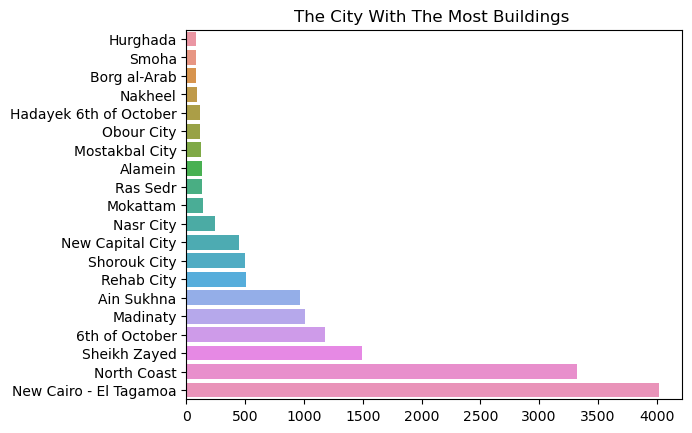

In [59]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

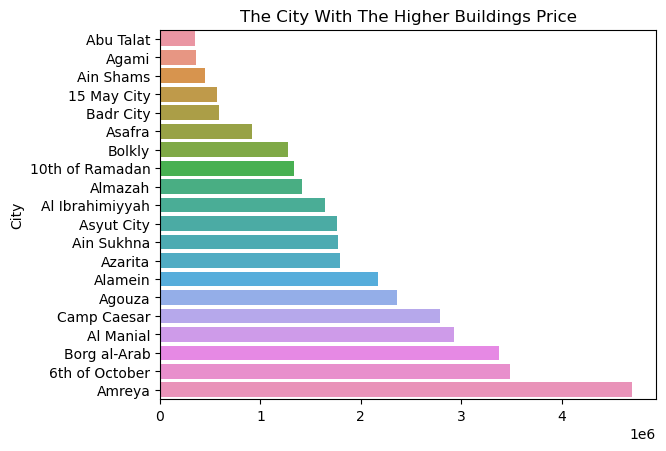

In [60]:
lpm = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

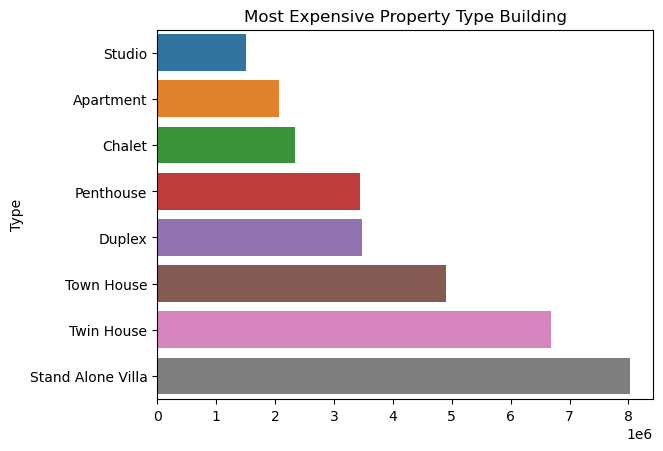

In [61]:
lpp = df.groupby('Type')['Price'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

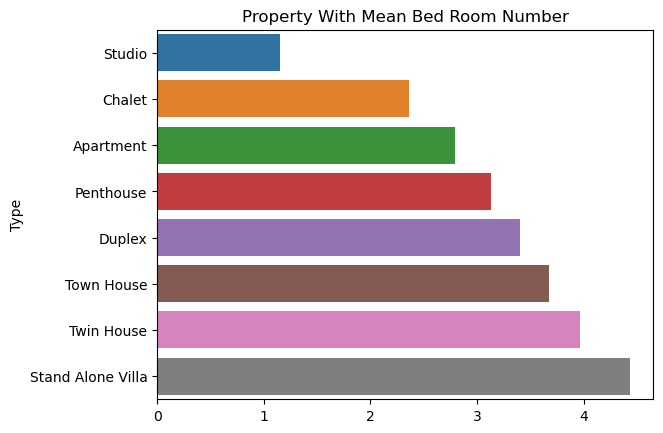

In [62]:
lpb = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

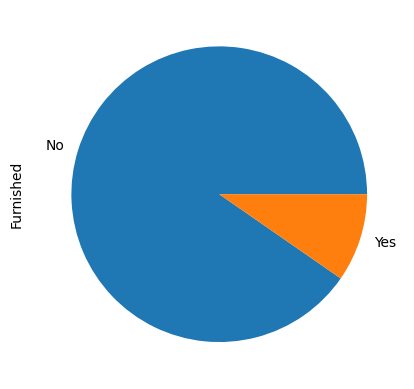

In [63]:
df['Furnished'].value_counts().plot(kind='pie');

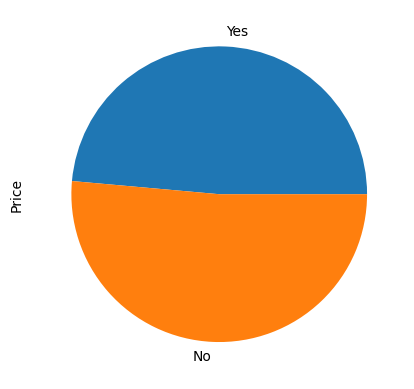

In [64]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

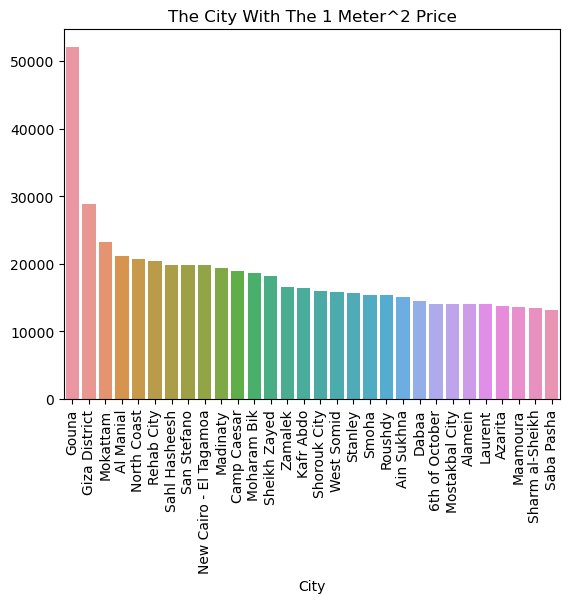

In [65]:
ind=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].values
sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

# From Visualization we can say the most important points:
- Price depend on the city highly than on space of the property.
- Furnished or Not Furnished does not affect highly on Price.

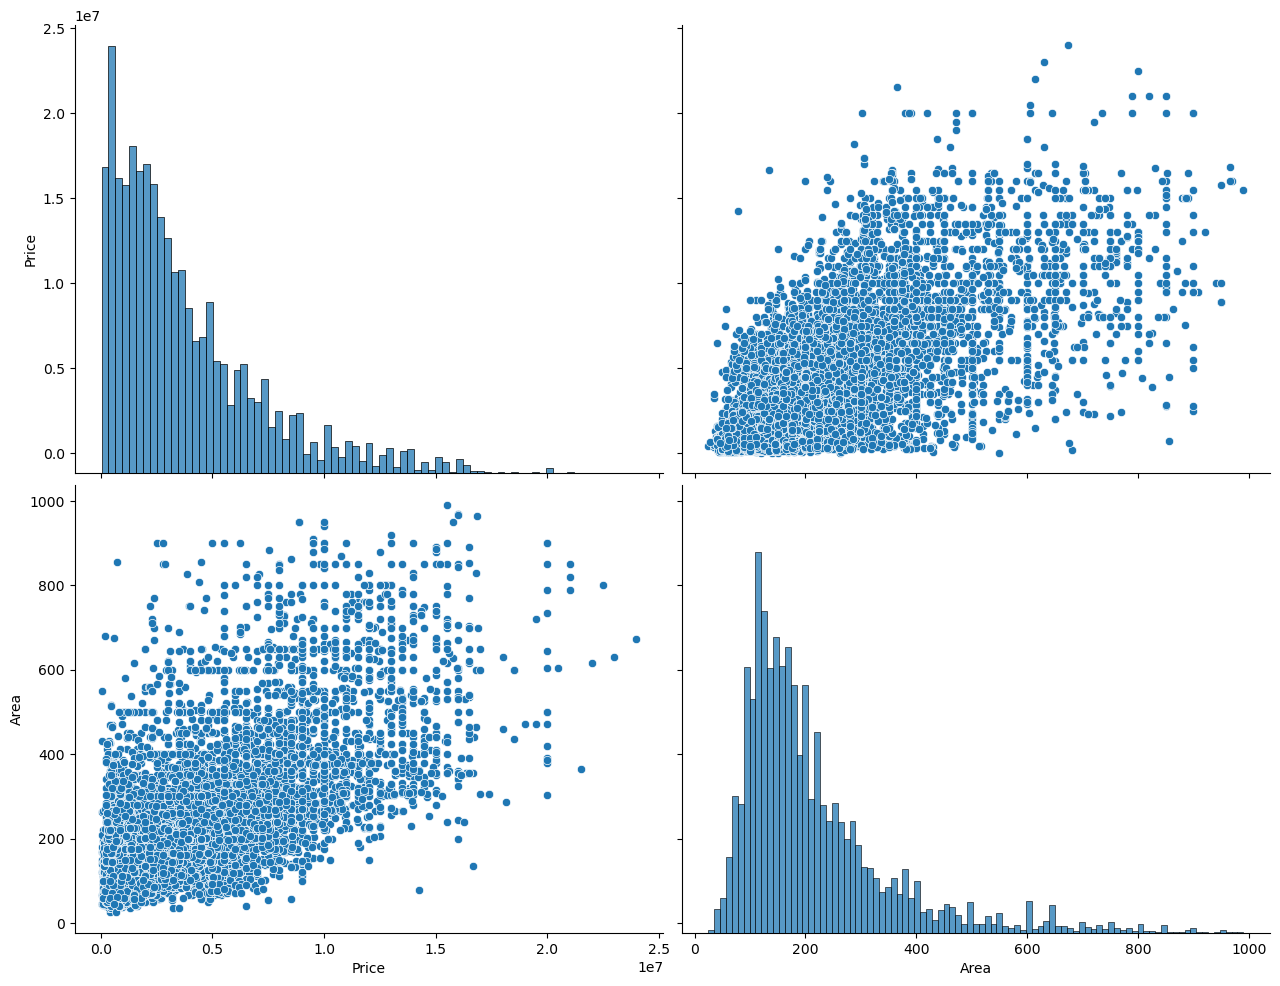

In [66]:
sns.pairplot(df, vars = ['Price', 'Area'], height=5, aspect=1.3);

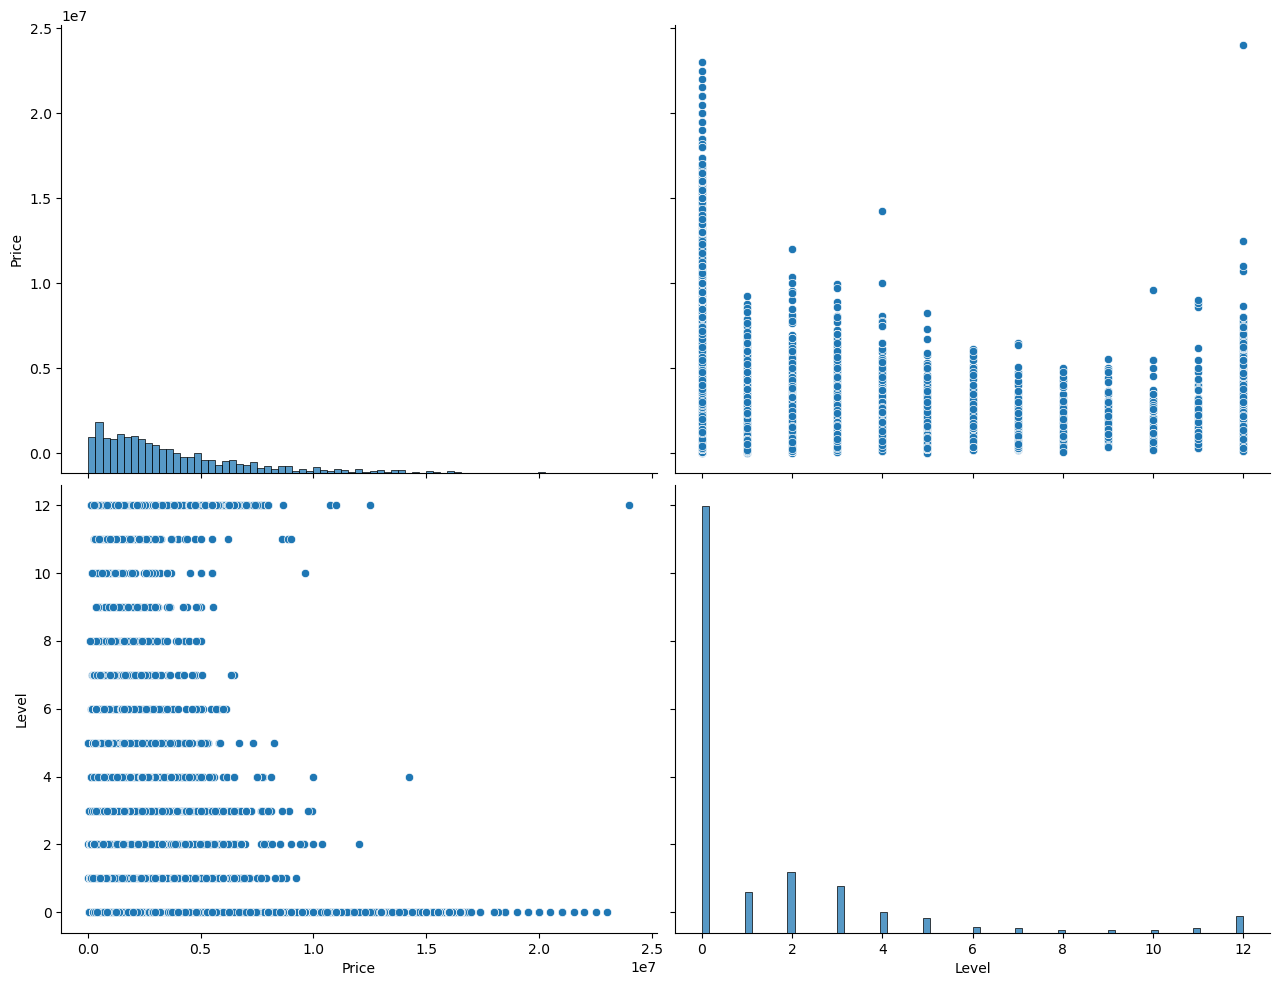

In [67]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

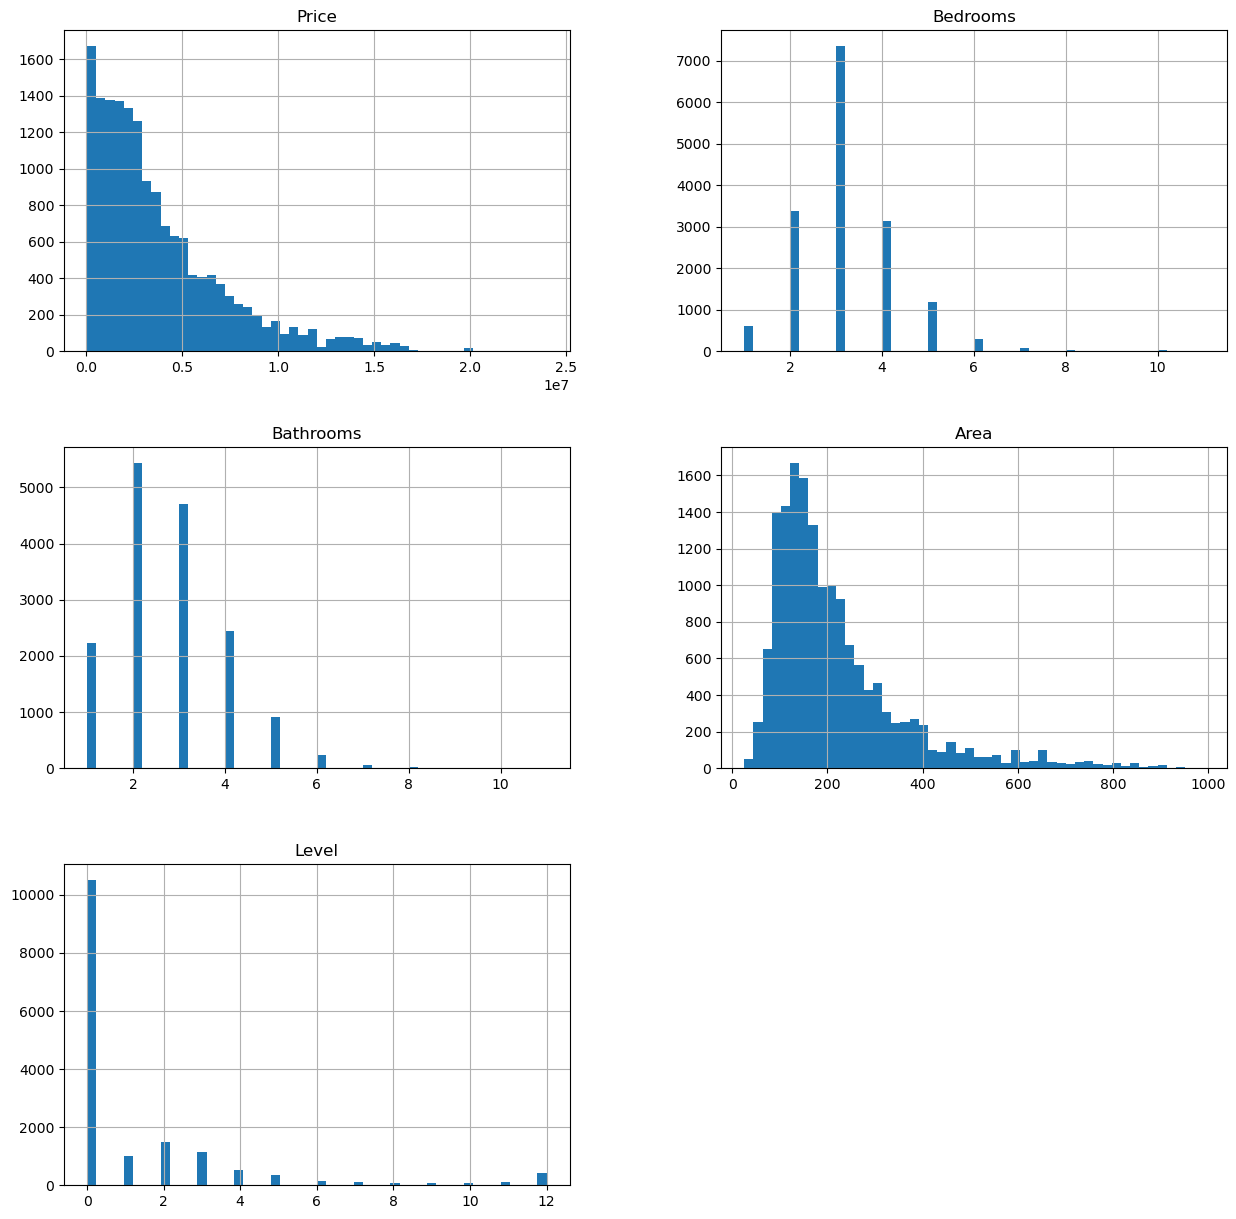

In [68]:
df.hist(bins=50, figsize=(15, 15));

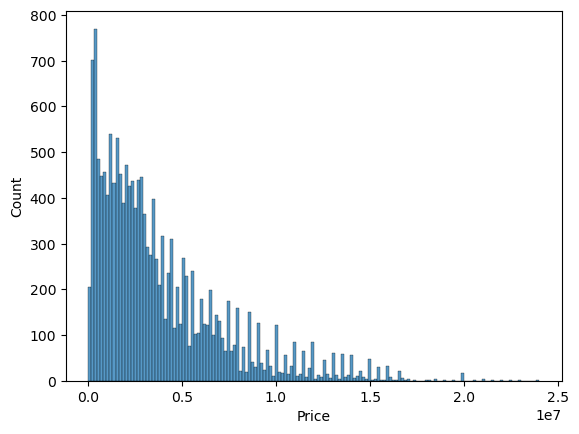

In [69]:
sns.histplot(data=df,x='Price',bins=150);

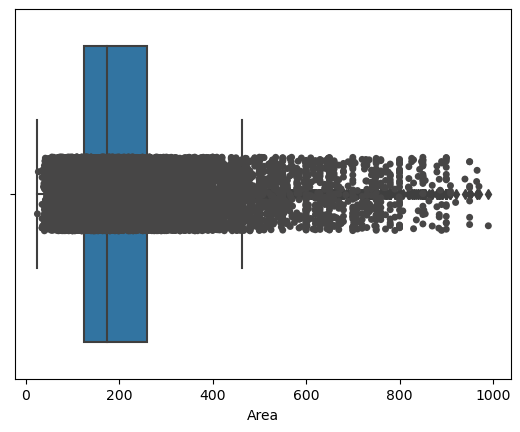

In [70]:
sns.boxplot(x='Area', data=df)
sns.stripplot(x='Area', data=df, color="#474646");

<AxesSubplot:xlabel='Area', ylabel='Count'>

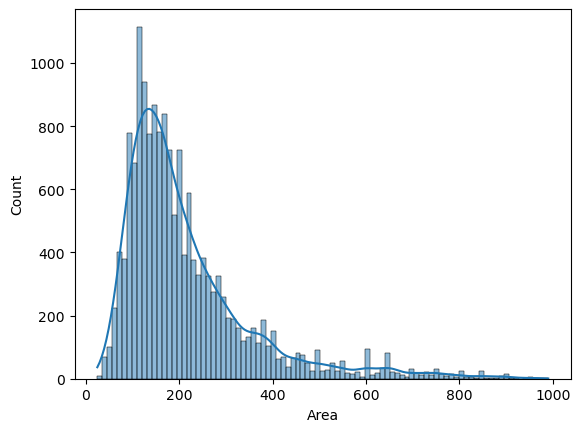

In [71]:
sns.histplot(data = df, x ='Area', kde = True)

In [72]:
df.corr()

,Price,Bedrooms,Bathrooms,Area,Level
Price,1.000000,0.520989,0.636456,0.685345,-0.217643
Bedrooms,0.520989,1.000000,0.797515,0.720963,-0.127501
Bathrooms,0.636456,0.797515,1.000000,0.740778,-0.203051
Area,0.685345,0.720963,0.740778,1.000000,-0.163978
Level,-0.217643,-0.127501,-0.203051,-0.163978,1.000000


In [73]:
df.to_csv('New_houes_data.csv')

### Now let's start our machine learning phase  

In [74]:
df = pd.get_dummies(df, columns = ['Type', 'Furnished','City' ,'Payment_Option','Delivery_Term'])
X = df.drop(columns = ['Price','Price_range'])
y = df[['Price']]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12043, 108), (4015, 108), (12043, 1), (4015, 1))

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [77]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "Lasso":Lasso(),
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

### Validate and Evaluate

In [78]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    y_pred = model.predict(X_test)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')  
    print(f'R2 Score: {r2_score(y_test, y_pred)}') 
    print('-'*30)

Using model: LR
Training Score: 0.6285012595079937
Test Score: 0.6064127216941875
MSE Score: 2052124.7543181132
R2 Score: 0.6064127216941875
------------------------------
Using model: KNNR
Training Score: 0.7409797561250862
Test Score: 0.5862074881776016
MSE Score: 2104139.5837948606
R2 Score: 0.5862074881776016
------------------------------
Using model: Lasso
Training Score: 0.6285012528145977
Test Score: 0.6064130008105554
MSE Score: 2052124.0266755533
R2 Score: 0.6064130008105554
------------------------------
Using model: SVR
Training Score: -0.09112284768599976
Test Score: -0.06309825117013257
MSE Score: 3372639.5984385577
R2 Score: -0.06309825117013257
------------------------------
Using model: DT
Training Score: 0.9743540295613898
Test Score: 0.5511753354616702
MSE Score: 2191399.6624167305
R2 Score: 0.5511753354616702
------------------------------
Using model: RF
Training Score: 0.941319140621579
Test Score: 0.7101194315168495
MSE Score: 1761135.5554225119
R2 Score: 0.71011

### Best model selection

In [79]:
results = []

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f'Training Score: {train_score}')
    print(f'Test Score: {test_score}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')
    print('-' * 30)

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values('Test Score', ascending=False)

print("\n=== Models Ranked by Test Score (Descending) ===")
print(results_df_sorted)

Using model: LR
Training Score: 0.6285012595079937
Test Score: 0.6064127216941875
RMSE: 2052124.7543181132
R2 Score: 0.6064127216941875
------------------------------
Using model: KNNR
Training Score: 0.7409797561250862
Test Score: 0.5862074881776016
RMSE: 2104139.5837948606
R2 Score: 0.5862074881776016
------------------------------
Using model: Lasso
Training Score: 0.6285012528145977
Test Score: 0.6064130008105554
RMSE: 2052124.0266755533
R2 Score: 0.6064130008105554
------------------------------
Using model: SVR
Training Score: -0.09112284768599976
Test Score: -0.06309825117013257
RMSE: 3372639.5984385577
R2 Score: -0.06309825117013257
------------------------------
Using model: DT
Training Score: 0.9743540295613898
Test Score: 0.5536356009433117
RMSE: 2185385.2495898544
R2 Score: 0.5536356009433117
------------------------------
Using model: RF
Training Score: 0.9412904341959605
Test Score: 0.7116884102834595
RMSE: 1756363.0151430687
R2 Score: 0.7116884102834595
-----------------

### Tuning and optimization

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

### RandomForest

Best Estimator: RandomForestRegressor(max_depth=16, min_samples_leaf=3, min_samples_split=13,
                      n_estimators=400)
Best Params: {'n_estimators': 400, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_depth': 16}
Training Score: 0.823880752757214
Testing Score: 0.7008565442837635
Other Metrics In Testing Data: 
MSE: 3200707387213.88
MAE: 1200908.1334763148


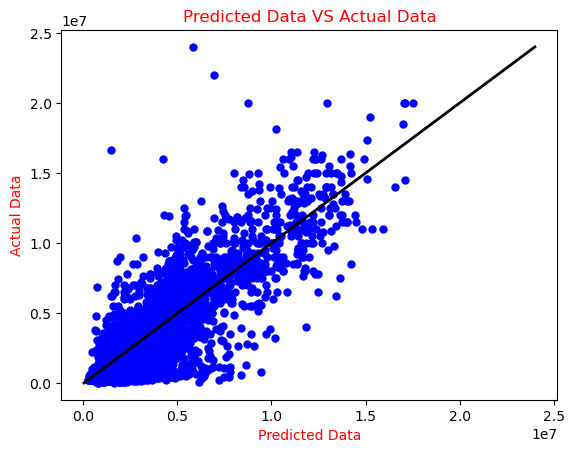

In [82]:
#Randomized search
params = [
    {'n_estimators':[100,200,3000,400,500,600],
     'max_depth':list(range(5,20)),'min_samples_split':list(range(2,15)),"min_samples_leaf":[2,3,4,5]
     }
         ]
rand_search = RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-1)

#Fitting the model
rand_search.fit(X_train,y_train.values.ravel())

#The best estimator
print('Best Estimator:',rand_search.best_estimator_)

#The best parameters
print('Best Params:',rand_search.best_params_)

#The predicted data
rand_pred = rand_search.predict(X_test)

#Decision tree performance after tuning
performance(rand_search,X_train,y_train,rand_pred,y_test)

#Plotting the results
plt.scatter(rand_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

### XGBRegressor

Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Params: {'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.01}
Training Score: 0.8419240807052134
Testing Score: 0.7140710513242212
Other Metrics In Testing Data: 
MSE: 3059317798056.6836
MAE: 1200408.64750934


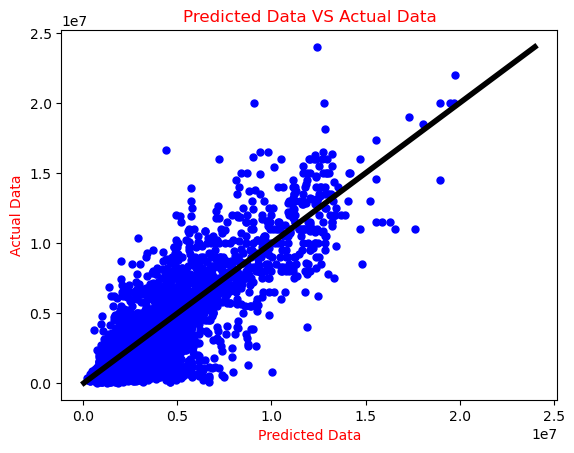

In [83]:
#Randomized search
params = {
         'max_depth': list(range(5,15)),'n_estimators': [300,400,500,600,700],'learning_rate': [0.01,0.1,0.2,0.9]
         }
rand_search = RandomizedSearchCV(XGBRegressor(),params,cv=10,n_jobs=-1)

#Fitting the model
rand_search.fit(X_train,y_train)

#The best estimator
print('Best Estimator:',rand_search.best_estimator_)

#The best parameters
print('Best Params:',rand_search.best_params_)

#The predicted data
rand_pred = rand_search.predict(X_test)

#Decision tree performance after tuning
performance(rand_search,X_train,y_train,rand_pred,y_test)

#Plotting the results
plt.scatter(rand_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=4)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

in the end we get mid result using XGBRegressor model
with 
- Training Score: 0.8383016048773416
- Testing Score: 0.7224066464741059

In [84]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

model = XGBRegressor(n_estimators=600,max_depth=9,learning_rate=0.01,random_state=42)
model.fit(X_train,y_train)

#The predicted data
model_pred = model.predict(X_test)

#The performance
performance(model,X_train,y_train,model_pred,y_test)

Training Score: 0.8419240807052134
Testing Score: 0.7140710513242212
Other Metrics In Testing Data: 
MSE: 3059317798056.6836
MAE: 1200408.64750934


In [86]:
y_predict = model.predict(X_test)
r2_Score = r2_score(y_test, y_predict)*100
print(f"accuracy is {round(r2_Score,2)}%")

accuracy is 71.41%


Text(0, 0.5, 'Predicted value')

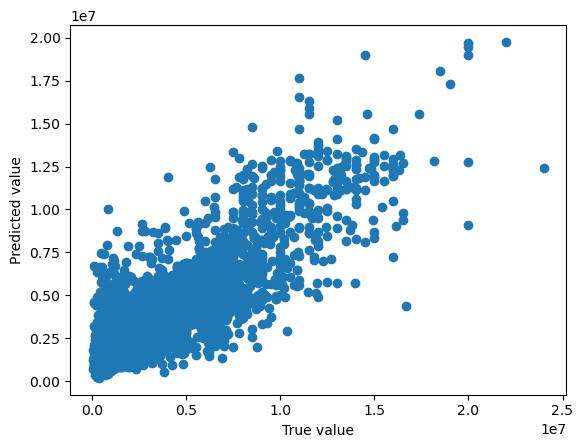

In [87]:
plt.scatter(y_test,y_predict)
plt.xlabel("True value")
plt.ylabel("Predicted value")

<AxesSubplot:xlabel='Price'>

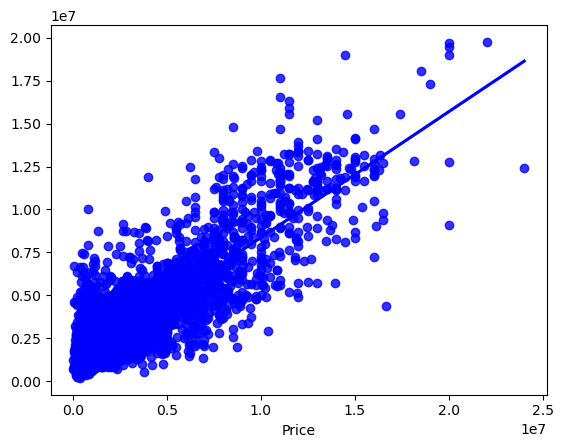

In [88]:
sns.regplot(x=y_test, y=y_predict,ci=None ,color='blue')

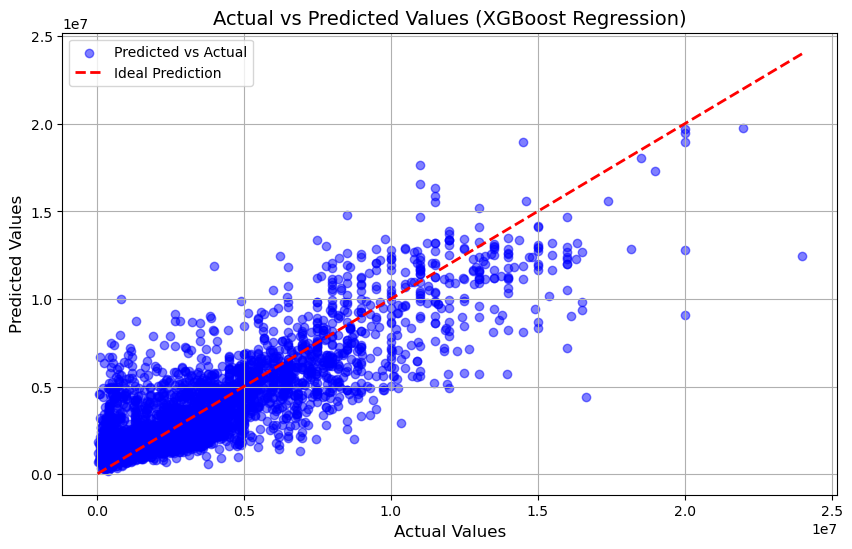

In [91]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values (XGBoost Regression)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Save the model

In [97]:
import joblib
import pandas as pd

joblib.dump(model, 'egypt_house_price_xgboost.joblib') 
feature_names = X_train.columns.tolist()  
pd.to_pickle(feature_names, 'feature_names.pkl') 

print("Model and feature names saved successfully!")

Model and feature names saved successfully!


### Project Deployment

In [108]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import pickle
from xgboost import XGBRegressor

# Set page config - Wide mode with centered title
st.set_page_config(
    page_title="Egypt House Price Predictor",
    layout="wide",
    page_icon="🏠"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .stSelectbox, .stNumberInput, .stRadio > div {
        padding: 10px !important;
        border-radius: 8px !important;
        border: 1px solid #e1e4e8 !important;
    }
    .stButton button {
        width: 100%;
        padding: 10px !important;
        border-radius: 8px !important;
        background-color: #4CAF50 !important;
        color: white !important;
        font-weight: bold !important;
    }
    .stMetric {
        padding: 15px;
        border-radius: 10px;
        background-color: #f0f2f6;
    }
    .property-card {
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        margin-bottom: 20px;
    }
</style>
""", unsafe_allow_html=True)

# Load model and features
@st.cache_resource
def load_model():
    model = joblib.load('egypt_house_price_xgboost.joblib')
    feature_names = pickle.load(open('feature_names.pkl', 'rb'))
    return model, feature_names

model, feature_names = load_model()

# All possible values
PROPERTY_TYPES = [
    'Apartment', 'Stand Alone Villa', 'Duplex', 
    'Town House', 'Twin House', 'Penthouse', 
    'Studio', 'Chalet'
]

CITIES = [
    'New Cairo', '6th of October', 'Sheikh Zayed City', 'Nasr City',
    'Maadi', 'Zamalek', 'Heliopolis', 'Giza', 'Madinaty', 'Shorouk City',
    '5th Settlement', 'Agouza', 'Dokki', 'Haram', 'Mohandessin',
    'El Rehab', 'Obour City', 'Sheraton', 'El Tagamo3', 'Katameya',
    'Badr City', 'Gesr El Suez', 'Hadayek El Ahram', 'Mostakbal City',
    'Zayed', 'El Marg', '10th of Ramadan', '15th of May', 'Abbassia',
    'Ain Shams', 'El Manial', 'El Mohandessin', 'El Sakkakini',
    'El Sayeda Zeinab', 'El Shorouk', 'Garden City', 'Hadayek El Kobba',
    'Helmeyat El Zaytoun', 'Mokattam', 'Rod El Farag', 'Saft El Laban',
    'Sharabi', 'Sheraton Heliopolis', 'Shubra', 'Zeitoun'
]

# App Header
st.title("Egypt Property Price Predictor")
st.markdown("""
<div style='background-color:#f0f2f6; padding:20px; border-radius:10px; margin-bottom:30px;'>
    <h3 style='color:#2e86de; margin-top:0;'>Get instant price estimates for properties across Egypt</h3>
    <p>Our AI model analyzes market trends to provide accurate valuations based on your property details.</p>
</div>
""", unsafe_allow_html=True)

# Main layout
col1, col2 = st.columns([1, 2], gap="large")

# Input Form in left column
with col1:
    with st.container():
        st.subheader("Property Details")
        
        with st.form("property_form"):
            # Property Characteristics
            st.markdown("**Basic Information**")
            property_type = st.selectbox("Type", PROPERTY_TYPES)
            city = st.selectbox("City", sorted(CITIES))
            area = st.number_input("Area (sqm)", min_value=30, max_value=2000, value=120)
            
            # Property Features
            st.markdown("**Features**")
            bedrooms = st.selectbox("Bedrooms", options=range(1, 12), index=2)
            bathrooms = st.selectbox("Bathrooms", options=range(1, 12), index=1)
            level = st.selectbox("Floor Level", 
                              options=[("Ground", 0)] + [(str(i), i) for i in range(1, 11)] + [("10+", 11), ("Penthouse (Highest)", 12)],
                              format_func=lambda x: x[0],
                              index=1)
            
            # Additional Details
            st.markdown("**Additional Details**")
            furnished = st.radio("Furnished", ["Yes", "No"], horizontal=True)
            payment = st.radio("Payment Option", ["Cash", "Installment"], horizontal=True)
            delivery = st.radio("Delivery Term", ["Finished", "Not Finished"], horizontal=True)
            
            # Submit button
            submitted = st.form_submit_button("Calculate Price", type="primary")

# Results in right column
with col2:
    if submitted:
        # Prepare input data
        input_data = {
            'Area': area,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Level': level[1],
            'Type': property_type,
            'City': city,
            'Furnished': furnished,
            'Payment_Option': payment,
            'Delivery_Term': delivery
        }
        
        # Create DataFrame and one-hot encode
        input_df = pd.DataFrame([input_data])
        for col in ['Type', 'Furnished', 'City', 'Payment_Option', 'Delivery_Term']:
            input_df[f"{col}_{input_data[col]}"] = 1
        
        # Ensure all feature columns exist
        for feature in feature_names:
            if feature not in input_df.columns:
                input_df[feature] = 0
        
        # Reorder columns
        input_df = input_df[feature_names]
        
        # Make prediction
        prediction = model.predict(input_df)[0]
        price_per_sqm = prediction / area
        
        # Display results
        st.subheader("Price Estimation")
        
        # Main price card
        st.markdown(f"""
        <div class='property-card' style='background-color:#f8f9fa;'>
            <div style='font-size:24px; color:#2e86de; font-weight:bold; margin-bottom:10px;'>
                Estimated Property Value
            </div>
            <div style='font-size:36px; color:#e74c3c; font-weight:bold; margin-bottom:15px;'>
                EGP {prediction:,.0f}
            </div>
            <div style='font-size:18px; color:#27ae60;'>
                Price per sqm: EGP {price_per_sqm:,.0f}
            </div>
        </div>
        """, unsafe_allow_html=True)
        
        # Property details card
        st.markdown("""
        <div class='property-card'>
            <h3 style='margin-top:0;'>Property Summary</h3>
        """, unsafe_allow_html=True)
        
        # Create two columns for details
        detail_col1, detail_col2 = st.columns(2)
        
        with detail_col1:
            st.markdown(f"""
            - **Type**: {property_type}
            - **City**: {city}
            - **Area**: {area} sqm
            - **Bedrooms**: {bedrooms}
            """)
        
        with detail_col2:
            st.markdown(f"""
            - **Bathrooms**: {bathrooms}
            - **Floor**: {level[0]}
            - **Furnished**: {furnished}
            - **Payment**: {payment}
            """)
        
        st.markdown("</div>", unsafe_allow_html=True)
        
        # Disclaimer
        st.markdown("""
        <div style='margin-top:20px; font-size:14px; color:#7f8c8d;'>
        <i>Note: This estimate is based on current market trends and should be used as a reference only. 
        Actual prices may vary depending on specific property conditions and market fluctuations.</i>
        </div>
        """, unsafe_allow_html=True)

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align:center; color:#7f8c8d; font-size:14px;'>
    <p>© 2023 Egypt Property Price Predictor | Powered by XGBoost AI Model</p>
</div>
""", unsafe_allow_html=True)

Writing app.py


In [109]:
!streamlit run app.py

^C


# THANKS EPSILON :)